## Pre-analysis of Abalone Project 1

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# (optional) sklearn imports you may use later
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------------
# Plot / display settings
# ----------------------
plt.rcParams["figure.dpi"] = 120
sns.set_context("notebook")
pd.options.display.float_format = "{:.3f}".format

# ----------------------
# Load data
# ----------------------
DATA_PATH = r"C:\Users\U436576\OneDrive - Danfoss\Desktop\DTU\abalone\abalone.data"
COL_NAMES = [
    "Sex","Length","Diameter","Height",
    "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"
]

abalone = pd.read_csv(DATA_PATH, header=None, names=COL_NAMES)

# ----------------------
# Parse types
# ----------------------
abalone["Sex"] = abalone["Sex"].astype("category")

numeric_cols = ["Length","Diameter","Height",
                "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]
abalone[numeric_cols] = abalone[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Keep Rings as nullable integer (preserves NaN if any)
abalone["Rings"] = abalone["Rings"].astype("Int64")

# ----------------------
# Scale continuous features by 200 (exclude Rings)
# ----------------------
cont_cols = ["Length","Diameter","Height",
             "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]
SCALE_FACTOR = 200

# ensure float before scaling, then scale in-place
abalone[cont_cols] = abalone[cont_cols].astype(float) * SCALE_FACTOR

print(f"Applied ×{SCALE_FACTOR} scaling to continuous features: {cont_cols}\n")

# ----------------------
# Quick checks
# ----------------------
print("Shape:", abalone.shape)

print("\nHead:")
display(abalone.head())

print("\nInfo:")
print(abalone.info())

print("\nDescribe (numeric):")
display(abalone.describe())

# Detect types programmatically (after scaling)
num_cols = abalone.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in abalone.columns if c not in num_cols]
print("\nDetected numeric columns:", num_cols)
print("Detected categorical columns:", cat_cols)

# ----------------------
# Attribute metadata (note the scaling)
# ----------------------
attribute_meta = pd.DataFrame([
    {"Attribute":"Sex",           "Role":"Feature", "Type":"Discrete",  "Scale":"Nominal", "Unit":"-",  "Description":"M, F, I (infant)"},
    {"Attribute":"Length",        "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"Longest shell measurement (values scaled ×200)"},
    {"Attribute":"Diameter",      "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"Perpendicular to length (values scaled ×200)"},
    {"Attribute":"Height",        "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"With meat in shell (values scaled ×200)"},
    {"Attribute":"WholeWeight",   "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Whole abalone weight (values scaled ×200)"},
    {"Attribute":"ShuckedWeight", "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Weight of meat (values scaled ×200)"},
    {"Attribute":"VisceraWeight", "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Gut weight after bleeding (values scaled ×200)"},
    {"Attribute":"ShellWeight",   "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Dry shell weight (values scaled ×200)"},
    {"Attribute":"Rings",         "Role":"Target",  "Type":"Discrete",  "Scale":"Ratio",   "Unit":"-",  "Description":"+1.5 ≈ age in years (proxy)"},
])
print("\nAttribute metadata:")
display(attribute_meta)


Applied ×200 scaling to continuous features: ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']

Shape: (4177, 9)

Head:


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,91.000,73.000,19.000,102.800,44.900,20.200,30.000,15
1,M,70.000,53.000,18.000,45.100,19.900,9.700,14.000,7
2,F,106.000,84.000,27.000,135.400,51.300,28.300,42.000,9
3,M,88.000,73.000,25.000,103.200,43.100,22.800,31.000,10
4,I,66.000,51.000,16.000,41.000,17.900,7.900,11.000,7



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sex            4177 non-null   category
 1   Length         4177 non-null   float64 
 2   Diameter       4177 non-null   float64 
 3   Height         4177 non-null   float64 
 4   WholeWeight    4177 non-null   float64 
 5   ShuckedWeight  4177 non-null   float64 
 6   VisceraWeight  4177 non-null   float64 
 7   ShellWeight    4177 non-null   float64 
 8   Rings          4177 non-null   Int64   
dtypes: Int64(1), category(1), float64(7)
memory usage: 269.5 KB
None

Describe (numeric):


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000
mean,104.798,81.576,27.903,165.748,71.873,36.119,47.766,9.934
std,24.019,19.848,8.365,98.078,44.393,21.923,27.841,3.224
min,15.000,11.000,0.000,0.400,0.200,0.100,0.300,1.000
25%,90.000,70.000,23.000,88.300,37.200,18.700,26.000,8.000
50%,109.000,85.000,28.000,159.900,67.200,34.200,46.800,9.000
75%,123.000,96.000,33.000,230.600,100.400,50.600,65.800,11.000
max,163.000,130.000,226.000,565.100,297.600,152.000,201.000,29.000



Detected numeric columns: ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
Detected categorical columns: ['Sex']

Attribute metadata:


,Attribute,Role,Type,Scale,Unit,Description
0,Sex,Feature,Discrete,Nominal,-,"M, F, I (infant)"
1,Length,Feature,Continuous,Ratio,mm,Longest shell measurement (values scaled ×200)
2,Diameter,Feature,Continuous,Ratio,mm,Perpendicular to length (values scaled ×200)
3,Height,Feature,Continuous,Ratio,mm,With meat in shell (values scaled ×200)
4,WholeWeight,Feature,Continuous,Ratio,g,Whole abalone weight (values scaled ×200)
5,ShuckedWeight,Feature,Continuous,Ratio,g,Weight of meat (values scaled ×200)
6,VisceraWeight,Feature,Continuous,Ratio,g,Gut weight after bleeding (values scaled ×200)
7,ShellWeight,Feature,Continuous,Ratio,g,Dry shell weight (values scaled ×200)
8,Rings,Target,Discrete,Ratio,-,+1.5 ≈ age in years (proxy)


#### check for unique values in Sex

In [38]:
print("Unique values in Sex:", abalone["Sex"].unique())
print("\nCategory counts (Sex):")
display(abalone['Sex'].value_counts())

Unique values in Sex: ['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']

Category counts (Sex):


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

### Attribute Analysis

In [39]:
summary_all = abalone[num_cols].describe().T
summary_all["skew"] = abalone[num_cols].skew()
summary_all["kurtosis"] = abalone[num_cols].kurt()
display(summary_all)

# Grouped by sex
summary_by_sex = abalone.groupby("Sex")[num_cols].agg(["count","mean","std","min","median","max"])
display(summary_by_sex)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Length,4177.000,104.798,24.019,15.000,90.000,109.000,123.000,163.000,-0.640,0.065
Diameter,4177.000,81.576,19.848,11.000,70.000,85.000,96.000,130.000,-0.609,-0.045
Height,4177.000,27.903,8.365,0.000,23.000,28.000,33.000,226.000,3.129,76.026
WholeWeight,4177.000,165.748,98.078,0.400,88.300,159.900,230.600,565.100,0.531,-0.024
ShuckedWeight,4177.000,71.873,44.393,0.200,37.200,67.200,100.400,297.600,0.719,0.595
VisceraWeight,4177.000,36.119,21.923,0.100,18.700,34.200,50.600,152.000,0.592,0.084
ShellWeight,4177.000,47.766,27.841,0.300,26.000,46.800,65.800,201.000,0.621,0.532
Rings,4177.000,9.934,3.224,1.000,8.000,9.000,11.000,29.000,1.114,2.331


C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\2309033543.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_sex = abalone.groupby("Sex")[num_cols].agg(["count","mean","std","min","median","max"])


Length                                       Diameter                \
     count    mean    std    min  median     max    count   mean    std   
Sex                                                                       
F     1307 115.819 17.232 55.000 118.000 163.000     1307 90.946 14.191   
I     1342  85.549 21.772 15.000  87.000 145.000     1342 65.299 17.622   
M     1528 112.278 20.539 31.000 116.000 156.000     1528 87.857 16.880   

            ... ShellWeight                      Rings                   \
       min  ...         std   min median     max count   mean   std min   
Sex         ...                                                           
F   39.000  ...      25.130 5.000 59.000 201.000  1307 11.129 3.104   5   
I   11.000  ...      16.985 0.300 22.600 131.000  1342  7.890 2.512   1   
M   22.000  ...      26.167 1.000 55.200 179.400  1528 10.705 3.026   3   

                
    median max  
Sex             
F   10.000  29  
I    8.000  21  
M   10.000  27  

[3 rows x 48 columns]

### Pre-check for outliers - pre sanity checks and more distributions

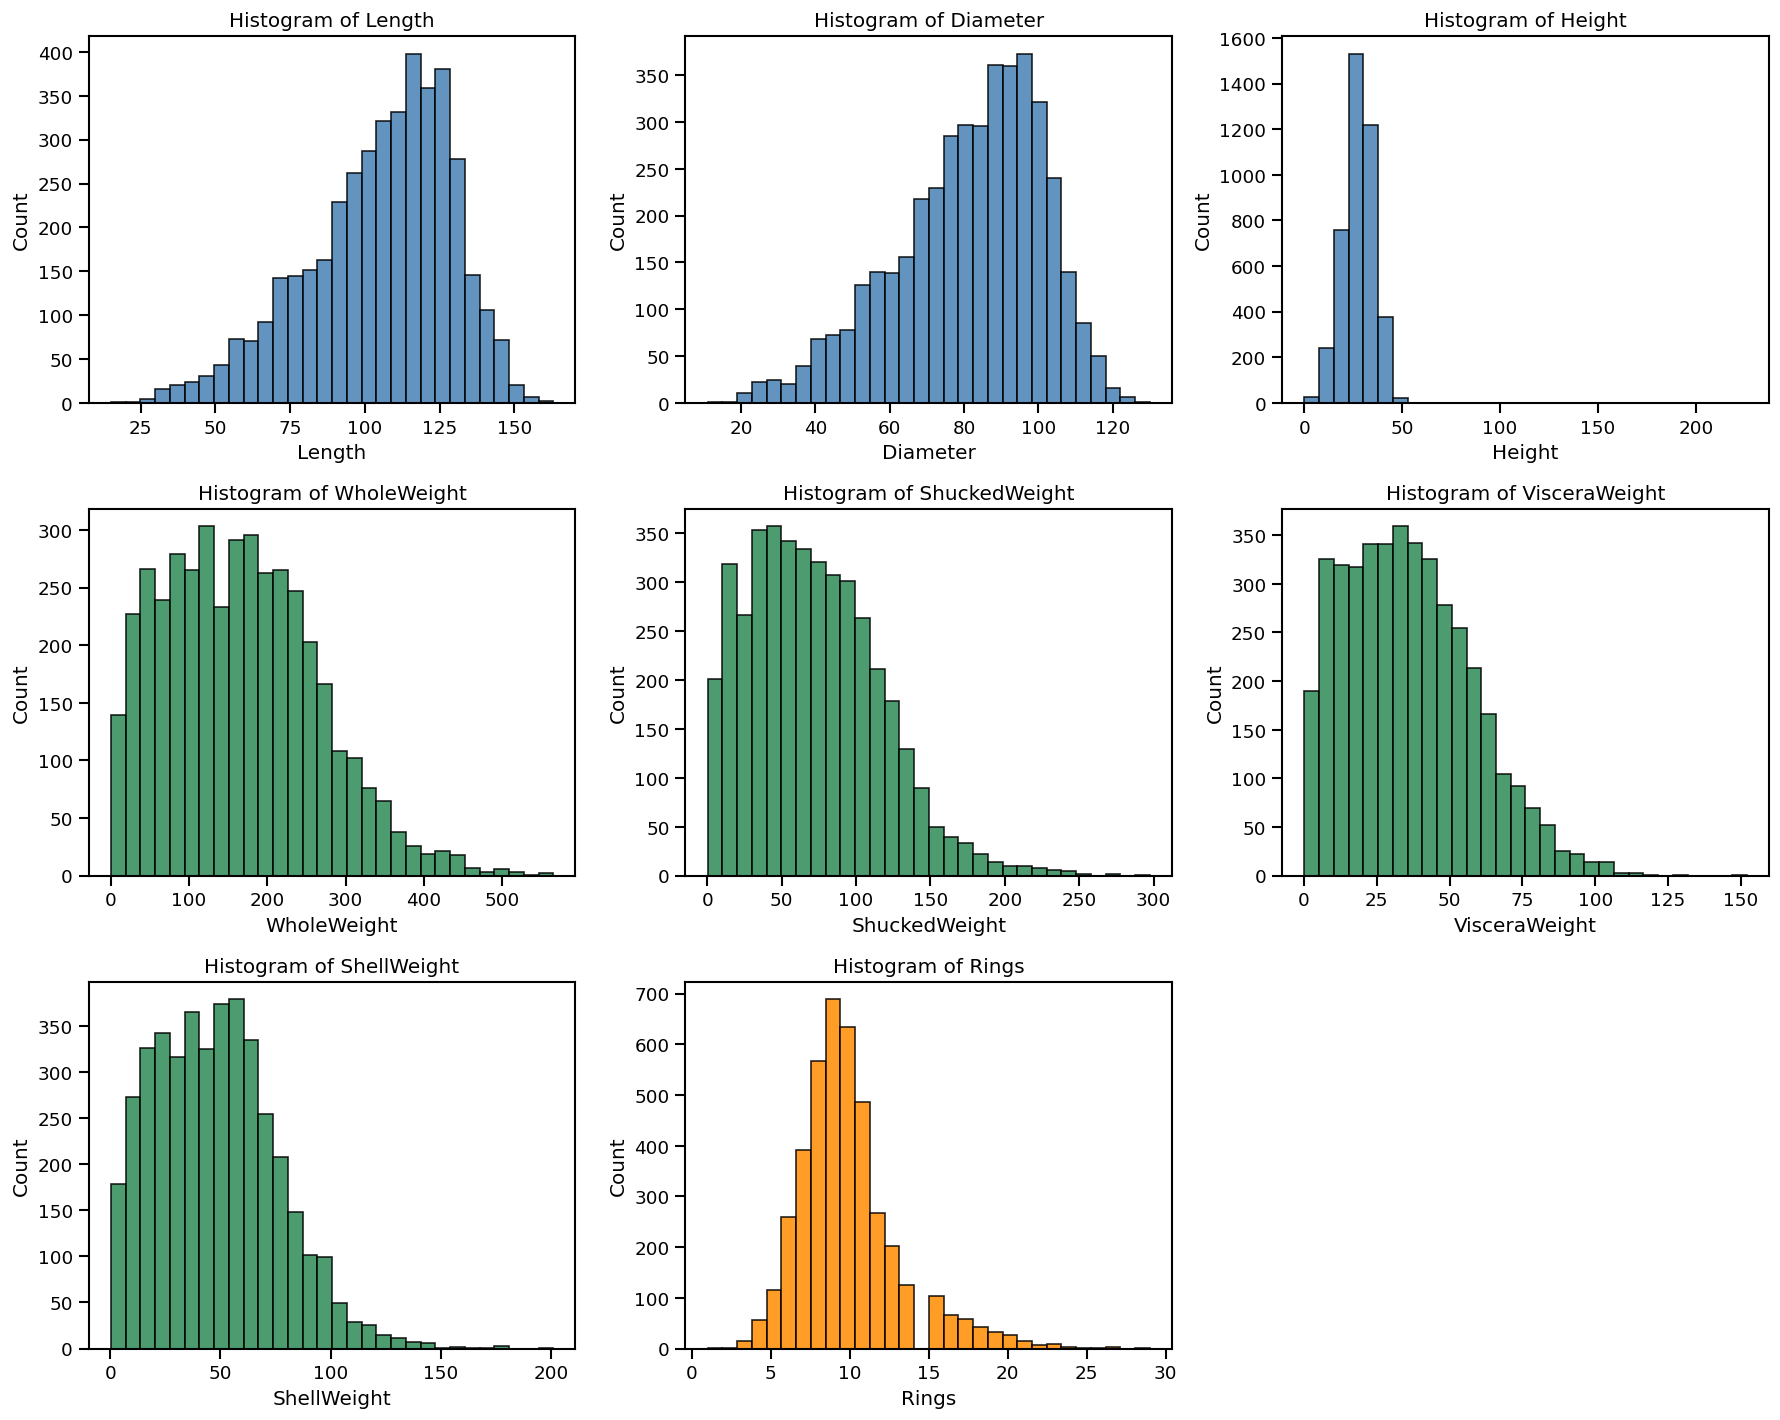

In [40]:
import math, os
cols = size_cols + weight_cols + age_cols
n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.ravel()

for i, c in enumerate(cols):
    axes[i].hist(abalone[c], bins=30, color=colors[c], edgecolor="black", alpha=0.85)
    axes[i].set_title(f"Histogram of {c}")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel("Count")

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
os.makedirs("figs", exist_ok=True)
fig.savefig("figs/hist.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/hist.pdf", bbox_inches="tight")
plt.show()


In [41]:
def sanity_checks(df):
    checks = {
        # physically impossible
        "Height <= 0": df["Height"] <= 0,
        "Length <= 0": df["Length"] <= 0,
        "Diameter <= 0": df["Diameter"] <= 0,
        "AnyWeight <= 0": (
            (df["WholeWeight"] <= 0) |
            (df["ShuckedWeight"] <= 0) |
            (df["VisceraWeight"] <= 0) |
            (df["ShellWeight"] <= 0)
        ),
        "Rings <= 0": df["Rings"] <= 0,

        # geometric consistency
        "Diameter > Length": df["Diameter"] > df["Length"],
        "Height > Length": df["Height"] > df["Length"],
        "Height > Diameter": df["Height"] > df["Diameter"],
    }

    rows = []
    for name, mask in checks.items():
        rows.append({
            "Check": name,
            "Count": int(mask.sum()),
            "Percent": 100 * float(mask.mean())
        })
    summary = pd.DataFrame(rows).sort_values("Count", ascending=False).reset_index(drop=True)

    examples = {}
    for name, mask in checks.items():
        idx = df.index[mask]
        examples[name] = df.loc[idx, ["Sex","Length","Diameter","Height",
                                      "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]].head(10)

    return summary, examples

sanity_summary, sanity_examples = sanity_checks(abalone)
display(sanity_summary)


height_le_zero = sanity_examples["Height <= 0"]
print(f"\nRows where Height <= 0: {len(height_le_zero)} (showing up to 10)")
display(height_le_zero)


,Check,Count,Percent
0,Height <= 0,2,0.048
1,Height > Diameter,1,0.024
2,Height > Length,1,0.024
3,Diameter > Length,1,0.024
4,AnyWeight <= 0,0,0.000
5,Diameter <= 0,0,0.000
6,Length <= 0,0,0.000
7,Rings <= 0,0,0.000



Rows where Height <= 0: 2 (showing up to 10)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1257,I,86.000,68.000,0.000,85.600,41.300,17.200,23.000,8
3996,I,63.000,46.000,0.000,26.800,11.500,5.700,70.100,6


### Investigation to check correlation with Maturity

In [42]:
import os, matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)

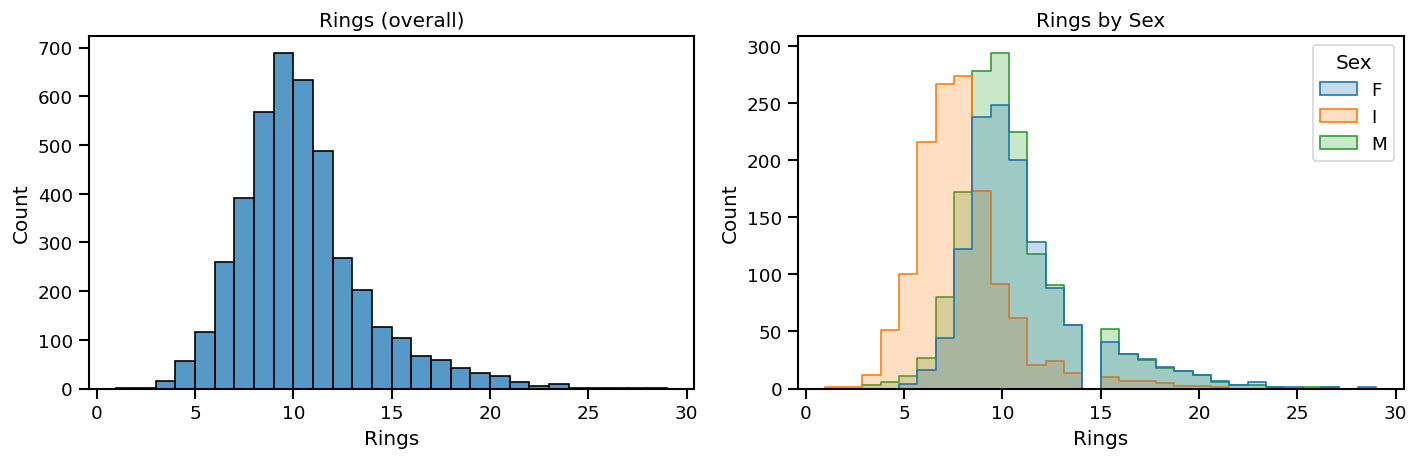

<Figure size 768x576 with 0 Axes>

In [43]:
#ring distribution
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(abalone["Rings"], bins=range(int(abalone["Rings"].min()), int(abalone["Rings"].max())+1), ax=ax[0])
ax[0].set_title("Rings (overall)"); ax[0].set_xlabel("Rings"); ax[0].set_ylabel("Count")

sns.histplot(data=abalone, x="Rings", hue="Sex", element="step", stat="count", common_norm=False, bins=30, ax=ax[1])
ax[1].set_title("Rings by Sex"); ax[1].set_xlabel("Rings"); ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

fig = plt.gcf()                          
fig.tight_layout()
fig.savefig("figs/rings_hist.png", dpi=300, bbox_inches="tight")   
fig.savefig("figs/rings_hist.pdf", bbox_inches="tight")



Correlation of Rings (all) with numeric attributes:


Rings           1.000
ShellWeight     0.628
Diameter        0.575
Height          0.557
Length          0.557
WholeWeight     0.540
VisceraWeight   0.504
ShuckedWeight   0.421
Name: Rings, dtype: float64


Correlation of WholeWeight (all) with numeric attributes:


WholeWeight     1.000
ShuckedWeight   0.969
VisceraWeight   0.966
ShellWeight     0.955
Diameter        0.925
Length          0.925
Height          0.819
Rings           0.540
Name: WholeWeight, dtype: float64

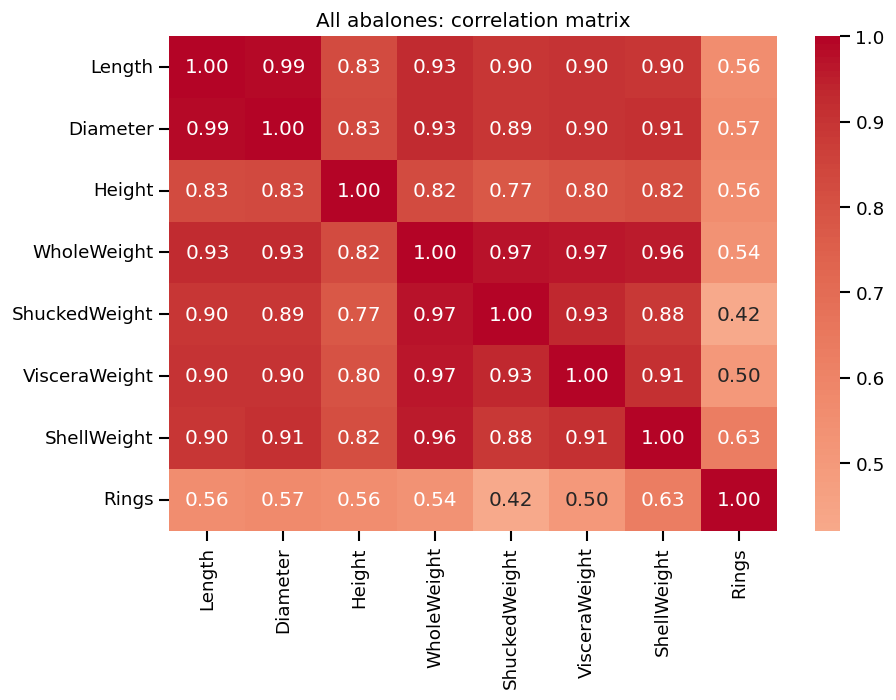

In [44]:
# Use all rows (no sex filter)
df = abalone

# Use your existing num_cols, or (re)derive them robustly:
# num_cols = df.select_dtypes(include="number").columns

corr_with_rings  = df.corr(numeric_only=True)["Rings"].sort_values(ascending=False)
corr_with_weight = df.corr(numeric_only=True)["WholeWeight"].sort_values(ascending=False)

print("Correlation of Rings (all) with numeric attributes:")
display(corr_with_rings)

print("\nCorrelation of WholeWeight (all) with numeric attributes:")
display(corr_with_weight)

# Heatmap on all numeric columns
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax)
ax.set_title("All abalones: correlation matrix")

import os
os.makedirs("figs", exist_ok=True)
fig.tight_layout()
fig.savefig("figs/abalone_corr_all.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/abalone_corr_all.pdf", bbox_inches="tight")
plt.show()

#### Test: correlation matrix for age groups

age_class
old       1447
young     1407
medium    1323
Name: count, dtype: int64


Text(0, 0.5, 'Instances')

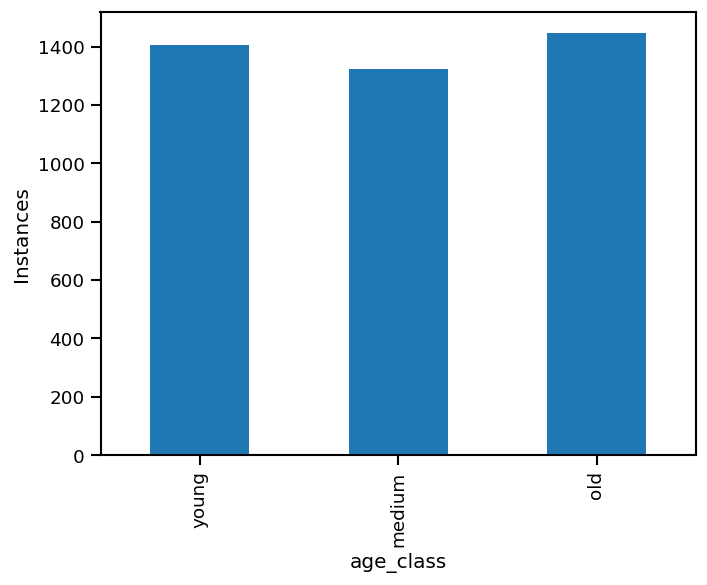

In [45]:
df['age_class'] = df["Rings"].apply(lambda rings: "young" if rings <=8 else ("medium" if rings <= 10 else "old"))
print(df['age_class'].value_counts())
counts = df['age_class'].value_counts()[['young','medium','old']]
counts.plot(kind='bar')

plt.ylabel('Instances')


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000,0.970,0.780,0.920,0.890,0.880,0.900,0.160
Diameter,0.970,1.000,0.780,0.910,0.880,0.870,0.910,0.170
Height,0.780,0.780,1.000,0.820,0.780,0.800,0.830,0.190
WholeWeight,0.920,0.910,0.820,1.000,0.970,0.950,0.950,0.200
ShuckedWeight,0.890,0.880,0.780,0.970,1.000,0.910,0.880,0.150
VisceraWeight,0.880,0.870,0.800,0.950,0.910,1.000,0.900,0.190
ShellWeight,0.900,0.910,0.830,0.950,0.880,0.900,1.000,0.230
Rings,0.160,0.170,0.190,0.200,0.150,0.190,0.230,1.000


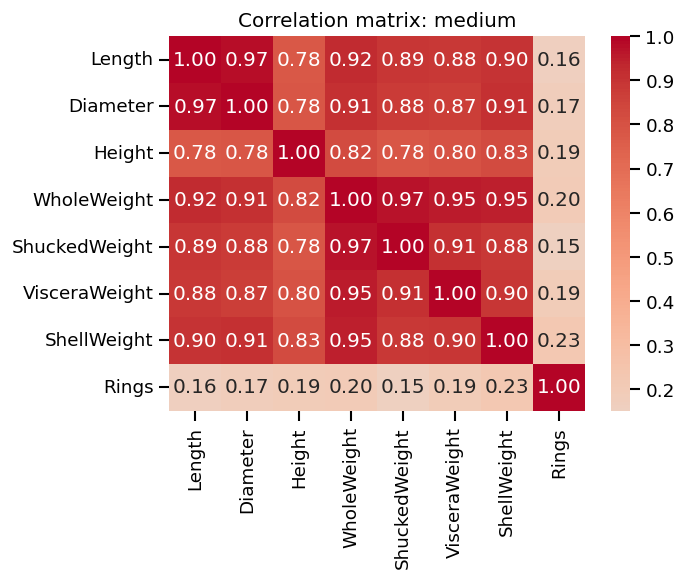

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000,0.970,0.770,0.930,0.900,0.890,0.850,0.010
Diameter,0.970,1.000,0.780,0.920,0.880,0.880,0.860,0.030
Height,0.770,0.780,1.000,0.800,0.720,0.750,0.790,0.150
WholeWeight,0.930,0.920,0.800,1.000,0.950,0.940,0.910,0.060
ShuckedWeight,0.900,0.880,0.720,0.950,1.000,0.890,0.790,-0.090
VisceraWeight,0.890,0.880,0.750,0.940,0.890,1.000,0.810,-0.010
ShellWeight,0.850,0.860,0.790,0.910,0.790,0.810,1.000,0.210
Rings,0.010,0.030,0.150,0.060,-0.090,-0.010,0.210,1.000


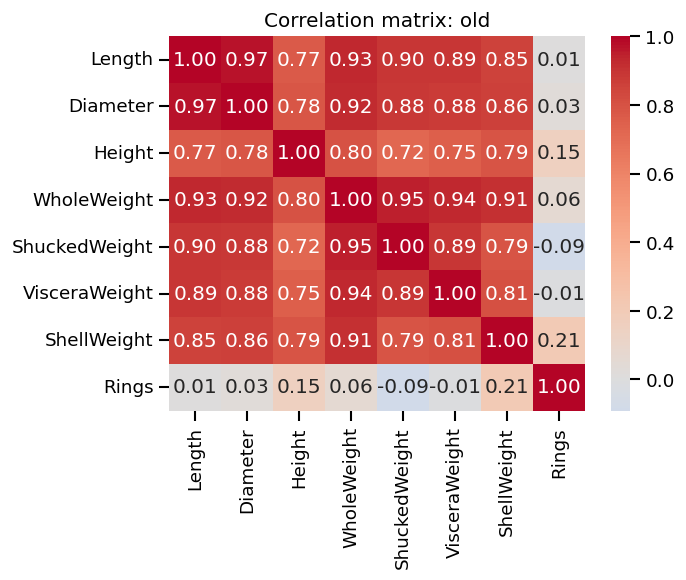

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000,0.990,0.690,0.920,0.900,0.900,0.910,0.740
Diameter,0.990,1.000,0.700,0.930,0.900,0.900,0.920,0.740
Height,0.690,0.700,1.000,0.680,0.660,0.660,0.670,0.540
WholeWeight,0.920,0.930,0.680,1.000,0.980,0.980,0.960,0.620
ShuckedWeight,0.900,0.900,0.660,0.980,1.000,0.950,0.920,0.590
VisceraWeight,0.900,0.900,0.660,0.980,0.950,1.000,0.940,0.600
ShellWeight,0.910,0.920,0.670,0.960,0.920,0.940,1.000,0.640
Rings,0.740,0.740,0.540,0.620,0.590,0.600,0.640,1.000


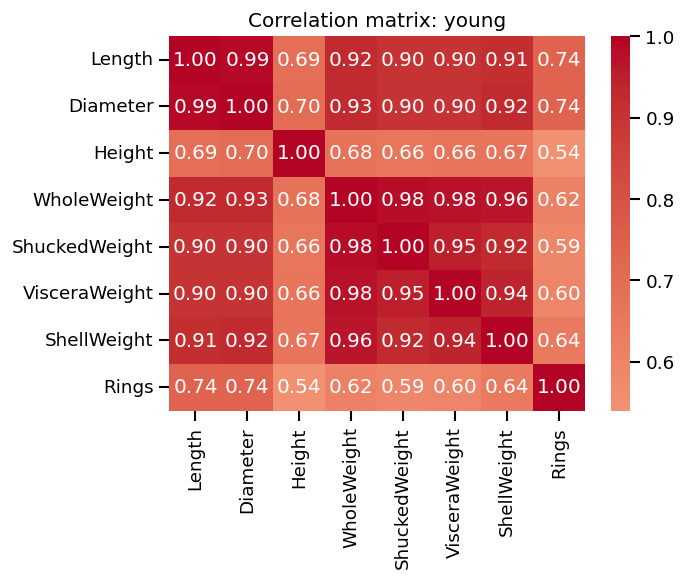

In [46]:
for g, df_g in abalone.groupby('age_class', dropna=True):
    corr = df_g[num_cols].corr(numeric_only=True)
    # optional: display the numbers too
    display(corr.round(2))

    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title(f"Correlation matrix: {g}")
    plt.tight_layout()
    plt.show()   # <- show, don't save
    # no plt.close() here


Size distribution per Sex

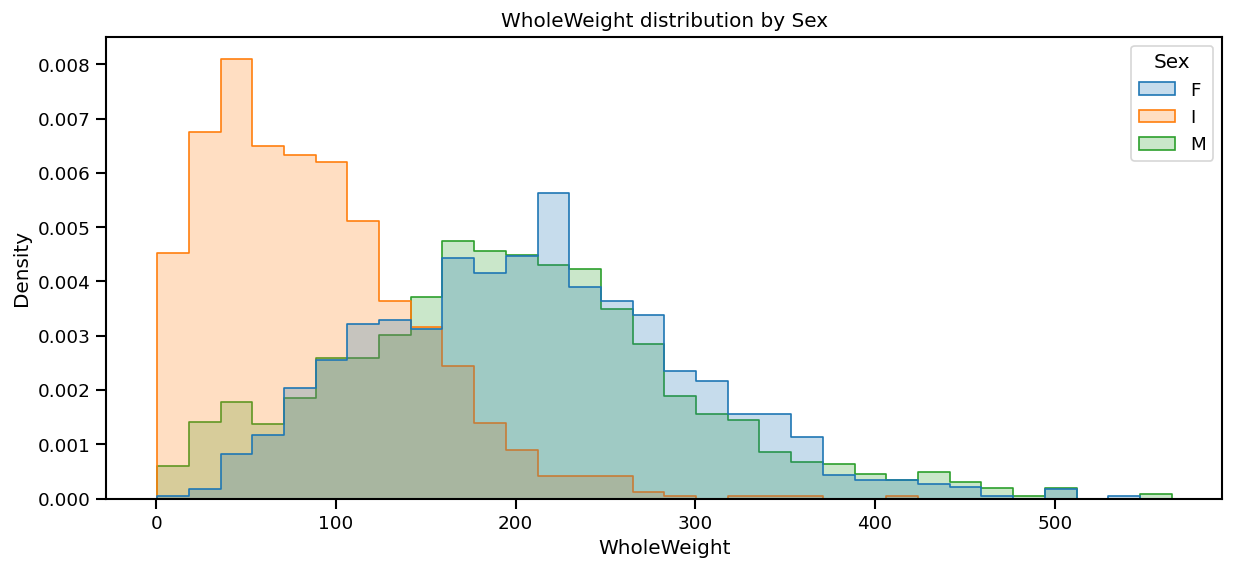

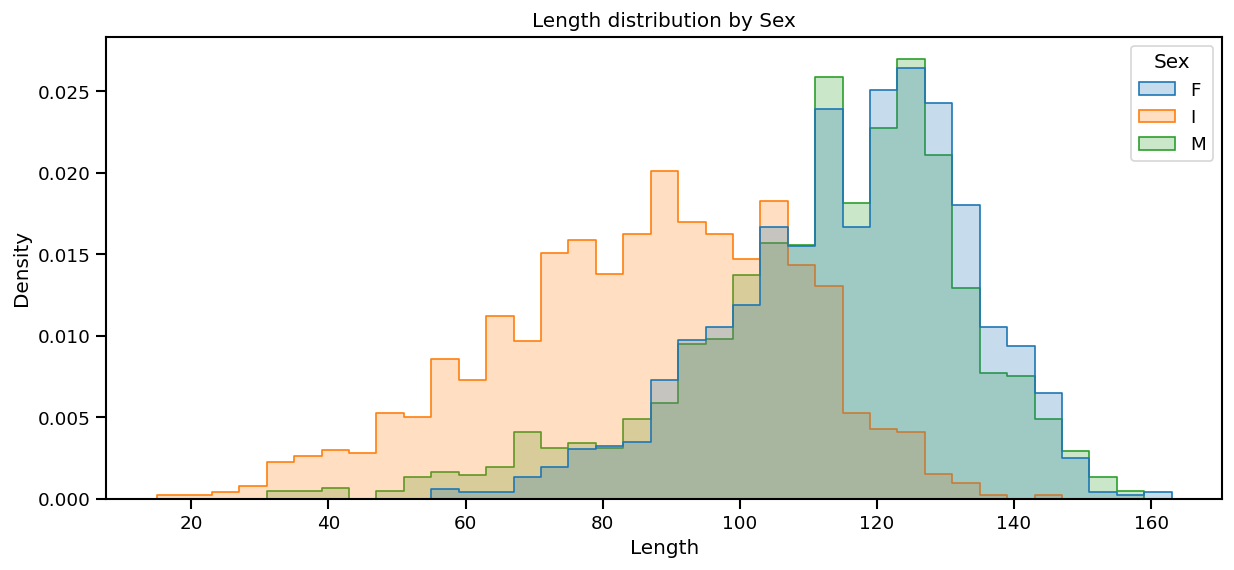

<Figure size 768x576 with 0 Axes>

In [47]:
plt.figure(figsize=(12,5))
sns.histplot(data=abalone, x="WholeWeight", hue="Sex", element="step", stat="density", common_norm=False)
plt.title("WholeWeight distribution by Sex")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=abalone, x="Length", hue="Sex", element="step", stat="density", common_norm=False)
plt.title("Length distribution by Sex")
plt.show()

fig = plt.gcf()                           
fig.tight_layout()
fig.savefig("figs/size_hist.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/size_hist.pdf", bbox_inches="tight")



#### Mean size per Sex

In [48]:
abalone.groupby("Sex")[["Length","Diameter","Height","WholeWeight"]].describe().T

C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\1811814418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abalone.groupby("Sex")[["Length","Diameter","Height","WholeWeight"]].describe().T


Sex                      F        I        M
Length      count 1307.000 1342.000 1528.000
            mean   115.819   85.549  112.278
            std     17.232   21.772   20.539
            min     55.000   15.000   31.000
            25%    105.000   72.000  101.000
            50%    118.000   87.000  116.000
            75%    128.000  102.000  126.000
            max    163.000  145.000  156.000
Diameter    count 1307.000 1342.000 1528.000
            mean    90.946   65.299   87.857
            std     14.191   17.622   16.880
            min     39.000   11.000   22.000
            25%     82.000   54.000   79.000
            50%     93.000   67.000   91.000
            75%    101.000   78.000  100.000
            max    130.000  110.000  126.000
Height      count 1307.000 1342.000 1528.000
            mean    31.602   21.599   30.276
            std      7.997    6.399    6.961
            min      3.000    0.000    5.000
            25%     28.000   17.000   26.000
            50%     32.000   22.000   31.000
            75%     35.000   26.000   35.000
            max    226.000   44.000  103.000
WholeWeight count 1307.000 1342.000 1528.000
            mean   209.306   86.273  198.292
            std     86.063   57.255   94.116
            min     16.000    0.400    3.100
            25%    146.000   41.100  134.325
            50%    207.700   76.800  195.150
            75%    264.050  119.875  253.125
            max    531.400  409.900  565.100

### Boxplot to visualize better

C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\3737785297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")
C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\3737785297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")


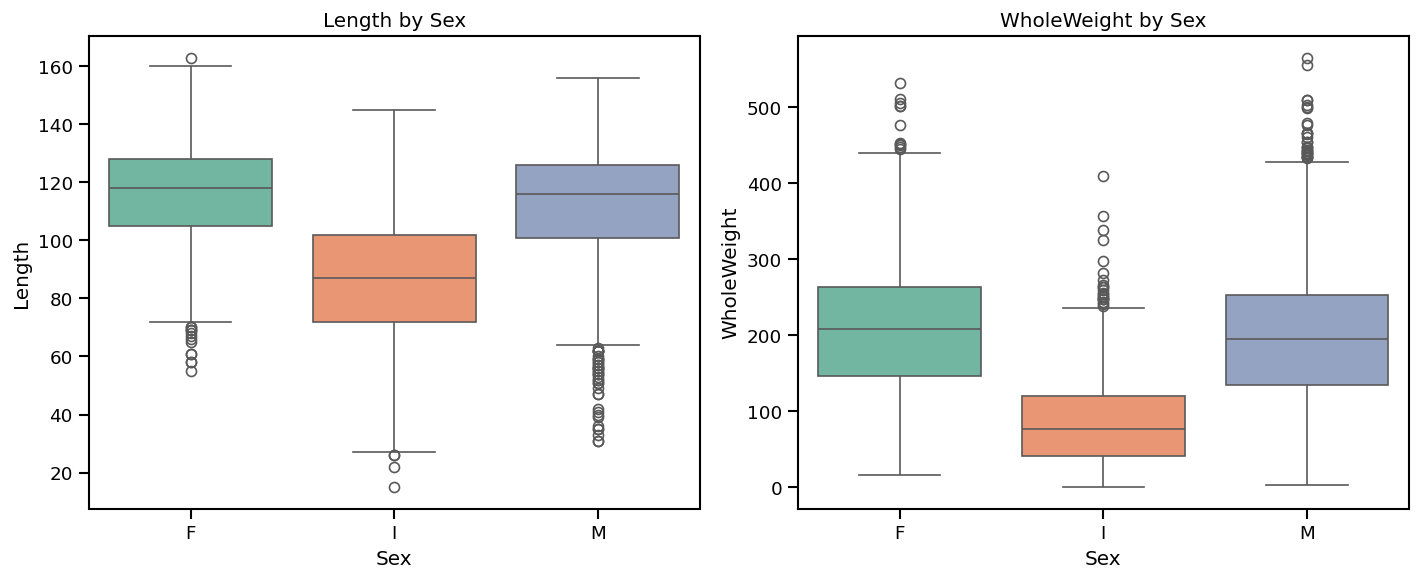

<Figure size 768x576 with 0 Axes>

In [49]:
attrs = ["Length", "WholeWeight"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, attr in enumerate(attrs):
    sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{attr} by Sex")
    axes[i].set_xlabel("Sex")
    axes[i].set_ylabel(attr)

plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.tight_layout()
fig.savefig("figs/box_size.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/box_size.pdf", bbox_inches="tight")


### IQR

In [50]:
def iqr_outlier_flags(df, cols):
    flags = {}
    for c in cols:
        q1, q3 = df[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        lo = q1 - 1.5*iqr
        hi = q3 + 1.5*iqr
        flags[c] = ((df[c] < lo) | (df[c] > hi))
    return pd.DataFrame(flags)

out_flags = iqr_outlier_flags(abalone, num_cols)
outlier_summary = out_flags.sum().sort_values(ascending=False).to_frame("n_outliers")
display(outlier_summary)


any_outlier_idx = out_flags.any(axis=1)
print(f"Rows flagged as outlier in >=1 attribute: {any_outlier_idx.sum()}")
display(abalone.loc[any_outlier_idx].head(10))


,n_outliers
Rings,278
Diameter,59
Length,49
ShuckedWeight,48
ShellWeight,35
WholeWeight,30
Height,29
VisceraWeight,26


Rows flagged as outlier in >=1 attribute: 396


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,age_class
6,F,106.000,83.000,30.000,155.500,47.400,28.300,66.000,20,old
7,F,109.000,85.000,25.000,153.600,58.800,29.900,52.000,16,old
9,F,110.000,88.000,30.000,178.900,62.900,30.200,64.000,19,old
32,M,133.000,105.000,33.000,267.600,110.300,71.500,70.000,18,old
33,F,136.000,110.000,35.000,359.600,163.000,78.500,91.000,19,old
36,F,108.000,95.000,31.000,243.400,106.100,61.500,68.000,16,old
43,I,41.000,30.000,11.000,8.400,5.100,3.000,2.400,5,young
44,I,42.000,30.000,10.000,8.400,3.500,2.500,3.000,4,young
72,F,119.000,95.000,34.000,249.400,96.000,45.000,85.000,20,old
81,M,124.000,102.000,35.000,323.000,102.100,38.400,135.000,12,old
